## Der zentrale Grenzwertsatz - ein Beispiel
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


In dieser Übung untersuchen wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Zunächst importieren wir den Datensatz und geben ihm einen passenden Namen.

In [2]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary*.

**FRAGE**
Wie groß ist die Wahrscheinlichkeit, dass bei einer zufällig gezogenen Stichprobe von $42$ Studenten ($n=42$) der mittlere NC-Werten dieser Gruppe von Studenten gleich oder größer als $2,5$ ist, oder formeller geschrieben $P(x≥2,5)$?

Um die obige Frage zu beantworten, beginnen wir zunächst mit der Datenaufbereitung. Dazu geben wir den NC-Werten einen eigenen Variablennamen (`nc_score`) und berechnen den Populationsmittelwert (`mu_pop`) und die Standardabweichung (`st_dev`).

In [3]:
nc_score = students['nc.score']
mu_pop = np.mean(nc_score)
mu_pop

2.1664813690981917

In [4]:
st_dev = np.std(nc_score) 
st_dev

0.8114987950197489

In [5]:
sample_size  = 42 # n

Daraus folgt, dass der Mittelwert der Grundgesamtheit (der Mittelwert der NC-Werte) ungefähr $2,17$ und die Standardabweichung der Grundgesamtheit $0,81$ beträgt. Um einen Eindruck von der Verteilung der Daten zu bekommen, zeichnen wir ein einfaches Histogramm.

Text(0, 0.5, 'Häufigkeit')

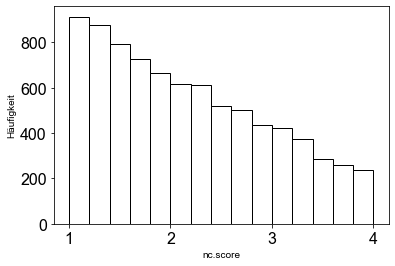

In [6]:
plt.hist(nc_score,bins = 15, color = 'white', edgecolor = 'k')
plt.xlabel('nc.score')
plt.ylabel('Häufigkeit')

Offensichtlich sind die Daten nicht normalverteilt, aber mit Hilfe des **zentralen Grenzwertsatzes** können wir sicher sein, dass bei einem ausreichend großen Stichprobenumfang ($n≥30$) die Verteilung unserer zu untersuchenden Statistik einer Normalverteilung entspricht mit

$$\mu_{\bar x} = \mu \qquad \text{und} \qquad \sigma_{\bar x}=\frac{\sigma}{\sqrt{n}}$$

Auf der Grundlage unserer Kenntnisse über die Bevölkerung können wir also relativ einfach $\mu_{\bar x}$ und $\sigma_{\bar x}$ berechnen:

$$\mu_{\bar x} = \mu \approx 2,17$$

$$\sigma_{\bar x}=\frac{\sigma}{\sqrt{n}} =\frac{0,81}{\sqrt{42}} \approx  0,1252246$$

Bevor wir fortfahren, wiederholen wir die Berechnungen von oben in Python.

In [7]:
mu_x_bar = mu_pop
st_error = st_dev/np.sqrt(sample_size)

Da wir nun den Mittelwert ($\mu_{\bar x}$) und die Standardabweichung ($\sigma_{\bar x}$) der Stichprobenverteilung kennen, können wir mit Hilfe von Python die Fläche unter der Kurve einer Normalverteilung $N∼(μ≈2,17,σ≈0,13)$ berechnen. Erinnern Sie sich, dass $P(x≥2.5)$ der Wahrscheinlichkeit entspricht, dass $x$ in das Intervall $[a \ $,$ \ \infty]$ fällt, also,

$$P(X \ge a) = 1 - P(X \le a) = \int_{a}^{\infty}f(x)dx$$

oder in grafischer Darstellung

![Alt-Text](56_integral.png)

Die Fläche unter der Kurve für das Intervall $[2,5  \ $,$ \ \infty]$ wird mit der Funktion `norm.cdf()` berechnet.

In [8]:
auc = 1-norm.cdf(2.5, loc = mu_x_bar, scale = st_error)
auc

0.0038663271018254397

Die Wahrscheinlichkeit, dass bei einer zufällig gezogenen Stichprobe von $42$ Studenten der mittlere NC-Wert dieser Untergruppe von Studenten gleich oder höher als $2,5$ ist, beträgt $0,4 \%$, oder formeller ausgedrückt $P(x≥2,5)=0,004$.

In der obigen Übung haben wir ein sehr schönes Ergebnis erhalten: $P(x≥2,5)=0,004$. . Dies wiederum bedeutet, dass bei einer wiederholten Stichprobenziehung, d. h. bei einer wiederholten Entnahme einer Zufallsstichprobe von $42$ Studenten, der Mittelwert der NC-Werte in etwa $0$ von $100$ Stichproben höher als $2,5$ sein wird. Da wir die Leistungsfähigkeit von Python kennen, klingt dies nach einer Behauptung, die sich leicht durch ein Computerexperiment überprüfen lässt.

Für eine ausreichend große Anzahl von Versuchen (Versuche = $5000$) nehmen wir also $100$ Mal den mittleren NC-Wert von $42$ zufällig ausgewählten Studierenden. Nach $5000$ Versuchen bewerten wir, ob im Durchschnitt von $100$ Stichproben etwa $0$ Stichproben einen mittleren NC-Wert von $2,5$ oder höher haben. (Bitte beachten Sie, dass die Berechnung einige Zeit in Anspruch nehmen kann!)

In [78]:
trials = 5000
samples = 100
n = 42
sampling_statistic = []
for trial in range(1,trials):
    mu_x_bar = []
    for i in range(1,samples):
        random_sample = nc_score.sample(n)
        mu_x_bar=np.mean(random_sample)
        if mu_x_bar >= 2.5:
            sampling_statistic.append(mu_x_bar)
sampling_statistic = pd.DataFrame(sampling_statistic)

In [79]:
len(sampling_statistic)/5000

0.4348

Das Ergebnis unseres Computerexperiments zeigt, dass von $100$ Stichproben etwa $0,4348$ Stichprobe einen mittleren NC-Wert von $2,5$ oder mehr aufweist. Dies kommt dem analytisch ermittelten Wert von $0,4  \%$ recht nahe.